In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [12]:
movies=pd.read_csv('movies.csv')

In [13]:
movies.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [16]:
movies['plot'] = movies['wiki_plot'].astype(str) + "\n" + \
                 movies['imdb_plot'].astype(str)

In [17]:
movies.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [19]:
sent_tokenized = [sent for sent in nltk.sent_tokenize("""Today (May 19, 2016) is his only daughter's wedding.Vito Corleone is the Godfather.""")]

In [20]:
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

In [21]:
import re

In [22]:
filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

In [23]:
from nltk.stem.snowball import SnowballStemmer 

In [24]:
stemmer = SnowballStemmer("english")

In [25]:
print("Without stemming: ", filtered)

Without stemming:  ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding.Vito', 'Corleone', 'is', 'the', 'Godfather']


In [27]:
stemmed_words = [stemmer.stem(word) for word in filtered]

In [28]:
print("After stemming:   ", stemmed_words)

After stemming:    ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wedding.vito', 'corleon', 'is', 'the', 'godfath']


In [35]:
def tokenize_and_stem(text):
    
    
    tokens = [sent for sent in nltk.sent_tokenize(text)]
    
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    
    stems =[stemmer.stem(word) for word in filtered_tokens]
    
    return stems

In [36]:
words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

["today (may 19, 2016) is his only daughter's wedding."]


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [46]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [47]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies["plot"]])
print(tfidf_matrix.shape)

(100, 1)


In [48]:
from sklearn.cluster import KMeans

In [49]:
km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)

C:\Users\Hiesenberg_\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
clusters = km.labels_.tolist()

In [52]:
movies["Cluster"] = clusters

In [56]:
movies['Cluster'].value_counts() 

0    90
1    10
Name: Cluster, dtype: int64

(array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

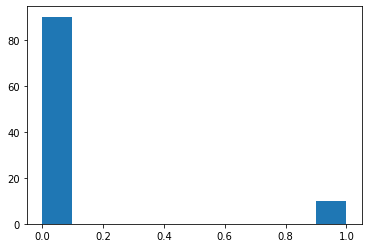

In [60]:
plt.hist(movies['Cluster'])

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [65]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [66]:
mergings = linkage(similarity_distance, method='complete')

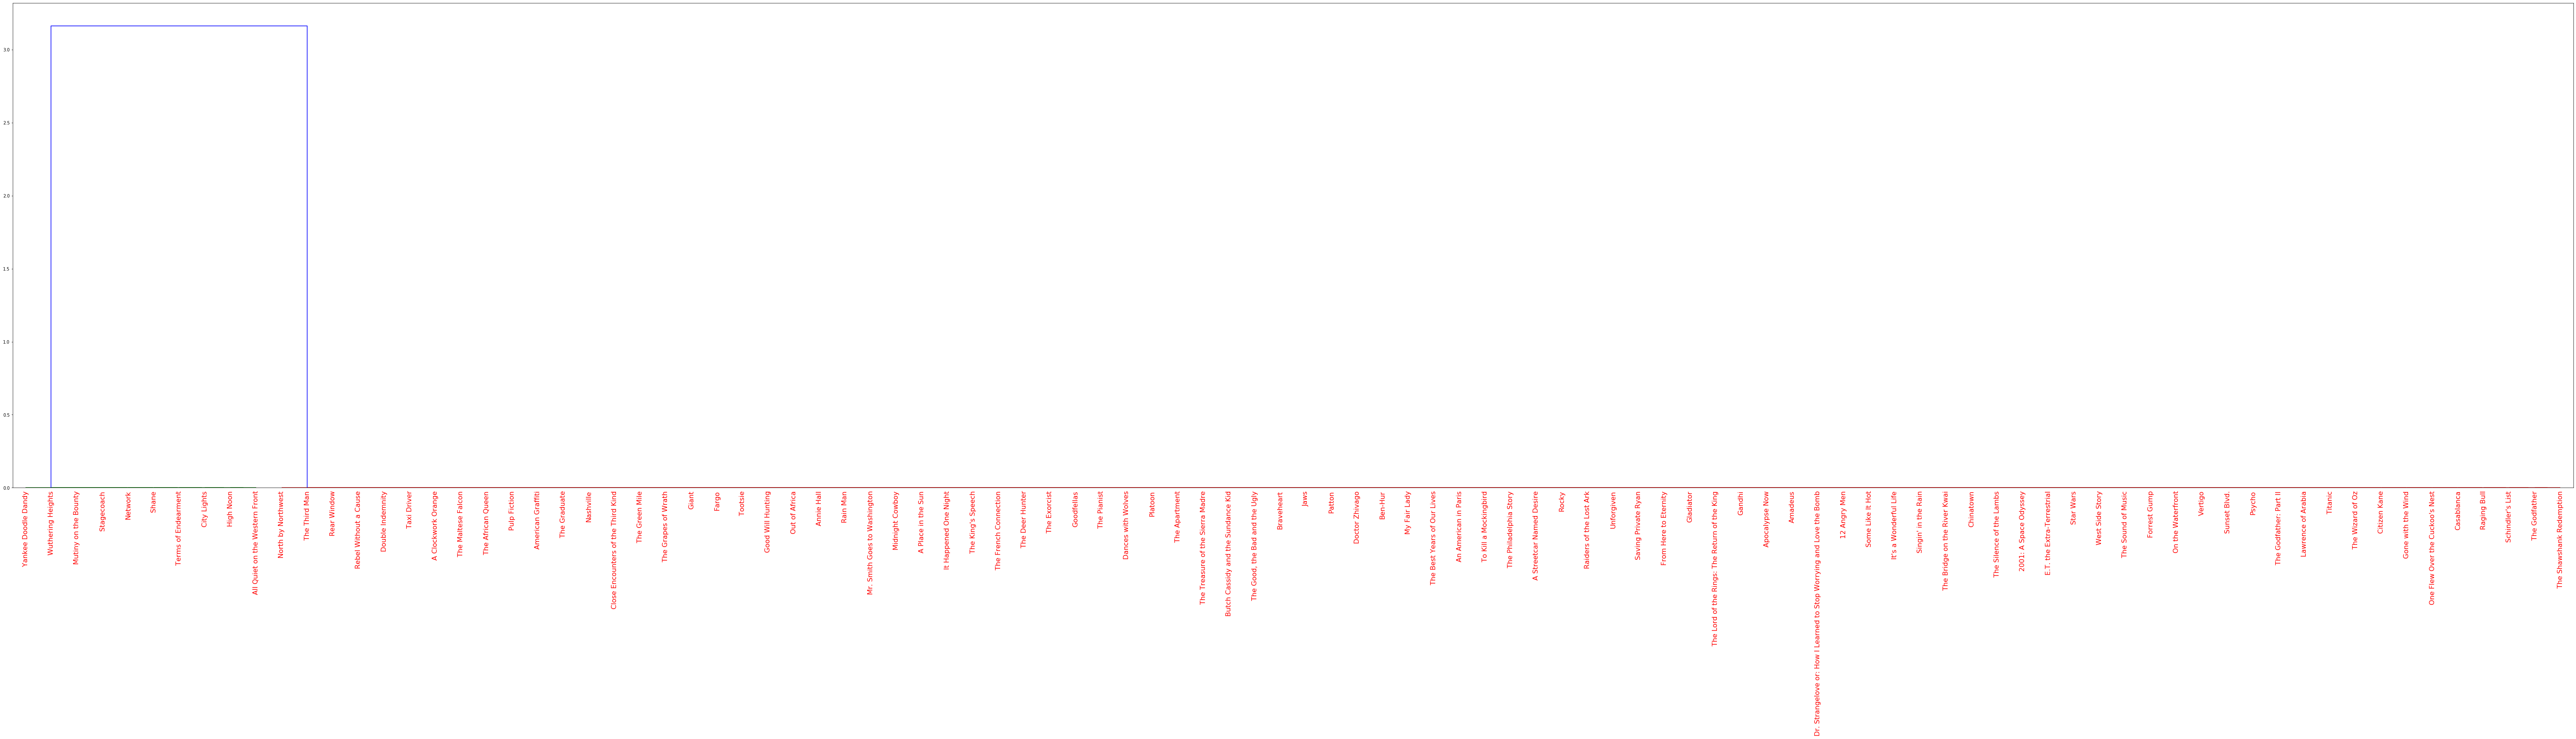

In [69]:
dendrogram_ = dendrogram(mergings,
               labels=[x for x in movies["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)
plt.show()